<a href="https://colab.research.google.com/github/edward302/Assignment-2/blob/main/Edward_mwaura_sumission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
#importing necessary module
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns


In [253]:
#Importing the data
road_accident_data=pd.read_csv('/content/drive/MyDrive/Road Accident Data.csv')

In [254]:
road_accident_data.sample(20)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
39086,200906X025182,12/1/2021,Tuesday,Not at junction or within 20 metres,Not at junction or within 20 metres,Slight,53.578112,Darkness - lights lit,Rochdale,NaN,-2.160060,2,3,Greater Manchester,Wet or damp,Dual carriageway,40,19:33,Rural,Raining no high winds,Car
56790,200914A029609,2/13/2021,Friday,Not at junction or within 20 metres,Not at junction or within 20 metres,Slight,53.573226,Darkness - lights lit,Doncaster,NaN,-1.216344,5,2,South Yorkshire,Dry,Dual carriageway,70,6:36,Rural,Fine no high winds,Car
173210,201001LX50668,7/28/2022,Wednesday,Auto traffic signal,Roundabout,Serious,51.494369,Daylight,Lambeth,NaN,-0.120514,1,1,Metropolitan Police,Dry,Roundabout,30,11:35,Urban,Fine no high winds,Car
210130,2.01E+12,1/17/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Serious,54.277266,Daylight,Richmondshire,NaN,-1.826423,1,2,North Yorkshire,Wet or damp,Single carriageway,60,12:25,Rural,Fine no high winds,Motorcycle 125cc and under
275720,201045EL48921,2/15/2022,Monday,Give way or uncontrolled,Roundabout,Slight,51.331857,Darkness - lights lit,Elmbridge,NaN,-0.417860,1,2,Surrey,Dry,Roundabout,30,5:44,Urban,Fog or mist,Motorcycle over 500cc
83851,20093102C1235,6/3/2021,Wednesday,Give way or uncontrolled,Roundabout,Slight,52.944347,Daylight,Nottingham,NaN,-1.190402,1,3,Nottinghamshire,Dry,Roundabout,30,7:17,Urban,Fine no high winds,Car
196044,201005EE06768,11/27/2022,Saturday,Give way or uncontrolled,T or staggered junction,Slight,53.449112,Daylight,Liverpool,NaN,-2.871348,1,1,Merseyside,Frost or ice,Single carriageway,30,12:00,Urban,Other,Car
165061,201001CW10640,4/13/2022,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.507814,Daylight,Westminster,NaN,-0.140280,1,1,Metropolitan Police,Dry,Single carriageway,30,16:55,Urban,Fine no high winds,Car
306151,2.01E+12,12/16/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.662622,Darkness - no lighting,Swansea,NaN,-4.082020,2,2,South Wales,Wet or damp,Single carriageway,60,22:54,Rural,Fine no high winds,Car
76020,200922E900101,1/3/2021,Saturday,Stop sign,T or staggered junction,Slight,52.058148,Darkness - lights lit,"Herefordshire, County of",NaN,-2.715673,3,2,West Mercia,Dry,Dual carriageway,30,21:30,Urban,Fine no high winds,Car


In [255]:
#indexing the columns
road_accident_data.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [256]:
#checking for blank values
road_accident_data.isnull().sum()

,0
Accident_Index,0
Accident Date,0
Day_of_Week,0
Junction_Control,0
Junction_Detail,0
Accident_Severity,0
Latitude,0
Light_Conditions,0
Local_Authority_(District),0
Carriageway_Hazards,302549


In [257]:
#Data cleaning
road_accident_data=road_accident_data.dropna()

In [258]:
#check for duplicated rows
road_accident_data.duplicated()

,0
195,False
414,False
476,False
854,False
889,False
...,...
307902,False
307911,False
307918,False
307960,False


In [259]:
#data types checking
road_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5305 entries, 195 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Accident_Index              5305 non-null   object 
 1   Accident Date               5305 non-null   object 
 2   Day_of_Week                 5305 non-null   object 
 3   Junction_Control            5305 non-null   object 
 4   Junction_Detail             5305 non-null   object 
 5   Accident_Severity           5305 non-null   object 
 6   Latitude                    5305 non-null   float64
 7   Light_Conditions            5305 non-null   object 
 8   Local_Authority_(District)  5305 non-null   object 
 9   Carriageway_Hazards         5305 non-null   object 
 10  Longitude                   5305 non-null   float64
 11  Number_of_Casualties        5305 non-null   int64  
 12  Number_of_Vehicles          5305 non-null   int64  
 13  Police_Force                5305 n

In [260]:
#data preprocessing ie dropping columns
dropping_columns = ['Carriageway_Hazards','Time','Urban_or_Rural_Area','Accident Date','Accident_Index','Day_of_Week']
road_accident_data = road_accident_data = road_accident_data.drop(columns=dropping_columns,axis=1)


In [261]:
#checking unique values in each column
for columns in road_accident_data.select_dtypes('object'):
  print(columns)
  print(road_accident_data[columns].unique())


Junction_Control
['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person'
 'Not at junction or within 20 metres' 'Stop sign' 'Auto traffic sigl']
Junction_Detail
['T or staggered junction' 'Crossroads'
 'Not at junction or within 20 metres' 'More than 4 arms (not roundabout)'
 'Private drive or entrance' 'Slip road' 'Roundabout' 'Mini-roundabout'
 'Other junction']
Accident_Severity
['Slight' 'Serious' 'Fatal']
Light_Conditions
['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lighting unknown' 'Darkness - lights unlit']
Local_Authority_(District)
['Kensington and Chelsea' 'City of London' 'Camden' 'Westminster'
 'Islington' 'Hammersmith and Fulham' 'Hackney' 'Tower Hamlets'
 'Waltham Forest' 'Redbridge' 'Havering' 'Newham' 'Barking and Dagenham'
 'Lambeth' 'Southwark' 'Lewisham' 'Bromley' 'Harrow' 'Greenwich' 'Bexley'
 'Barnet' 'Croydon' 'Richmond upon Thames' 'Hounslow'
 'Kingston upon Thames' 'Merton' 'Wandsworth' 

In [262]:
#Convert objects to numerical values
road_accident_data['Accident_Severity'] = road_accident_data['Accident_Severity'].map({'Slight': 0, 'Serious': 1, 'Fatal': 2})
road_accident_data ['Local_Authority_(District)'] = road_accident_data ['Local_Authority_(District)'].astype('category').cat.codes.astype('category')
road_accident_data ['Police_Force'] = road_accident_data ['Police_Force'].astype('category').cat.codes.astype('category')
road_accident_data ['Vehicle_Type'] = road_accident_data ['Vehicle_Type'].astype('category').cat.codes.astype('category')
road_accident_data ['Junction_Detail'] = road_accident_data ['Junction_Detail'].astype('category').cat.codes.astype('category')
#labling order
from sklearn.preprocessing import LabelEncoder
Label_encorder = LabelEncoder()
road_accident_data ['Road_Surface_Conditions'] = Label_encorder.fit_transform(road_accident_data ['Road_Surface_Conditions'])
road_accident_data ['Light_Conditions'] = Label_encorder.fit_transform(road_accident_data ['Light_Conditions'])
road_accident_data ['Weather_Conditions'] = Label_encorder.fit_transform(road_accident_data ['Weather_Conditions'])
road_accident_data ['Road_Type'] = Label_encorder.fit_transform(road_accident_data ['Road_Type'])
road_accident_data ['Junction_Control'] = Label_encorder.fit_transform(road_accident_data ['Junction_Control'])

In [263]:
#Check datasets
road_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5305 entries, 195 to 307972
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Junction_Control            5305 non-null   int64   
 1   Junction_Detail             5305 non-null   category
 2   Accident_Severity           5305 non-null   int64   
 3   Latitude                    5305 non-null   float64 
 4   Light_Conditions            5305 non-null   int64   
 5   Local_Authority_(District)  5305 non-null   category
 6   Longitude                   5305 non-null   float64 
 7   Number_of_Casualties        5305 non-null   int64   
 8   Number_of_Vehicles          5305 non-null   int64   
 9   Police_Force                5305 non-null   category
 10  Road_Surface_Conditions     5305 non-null   int64   
 11  Road_Type                   5305 non-null   int64   
 12  Speed_limit                 5305 non-null   int64   
 13  Weather_Conditions 

In [264]:
# split to features and targets
x = road_accident_data.drop('Accident_Severity', axis=1)
y = road_accident_data['Accident_Severity']


In [265]:
x.corr()

,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Weather_Conditions,Vehicle_Type
Junction_Control,1.000000,0.229091,-0.147928,0.029194,-0.001518,-0.003575,0.006311,0.026131,-0.146481,-0.017756,0.030402,-0.017901,-0.017773,0.007251
Junction_Detail,0.229091,1.000000,-0.024779,-0.030491,-0.014870,0.031918,-0.038681,-0.019744,0.008198,-0.039550,0.097709,-0.215001,-0.001659,-0.007858
Latitude,-0.147928,-0.024779,1.000000,0.017886,-0.133860,-0.377369,-0.005329,-0.032662,0.019984,0.043813,0.031755,0.042549,0.022680,0.003389
Light_Conditions,0.029194,-0.030491,0.017886,1.000000,0.017226,-0.049897,-0.005971,0.059736,-0.038509,-0.161419,0.044286,0.092747,-0.112384,-0.001629
Local_Authority_(District),-0.001518,-0.014870,-0.133860,0.017226,1.000000,0.013157,0.013273,-0.011333,0.169998,-0.004247,-0.007954,0.023745,0.002395,0.001156
Longitude,-0.003575,0.031918,-0.377369,-0.049897,0.013157,1.000000,-0.017697,0.006190,0.111497,-0.020613,-0.011503,-0.018293,-0.015185,-0.011367
Number_of_Casualties,0.006311,-0.038681,-0.005329,-0.005971,0.013273,-0.017697,1.000000,0.290711,-0.014055,0.045707,-0.108939,0.122440,0.017377,-0.006498
Number_of_Vehicles,0.026131,-0.019744,-0.032662,0.059736,-0.011333,0.006190,0.290711,1.000000,-0.010898,0.057334,-0.256294,0.168044,0.072076,-0.015519
Police_Force,-0.146481,0.008198,0.019984,-0.038509,0.169998,0.111497,-0.014055,-0.010898,1.000000,0.023062,-0.020164,-0.029739,-0.001910,-0.003992
Road_Surface_Conditions,-0.017756,-0.039550,0.043813,-0.161419,-0.004247,-0.020613,0.045707,0.057334,0.023062,1.000000,-0.009195,0.091729,0.573759,0.012019


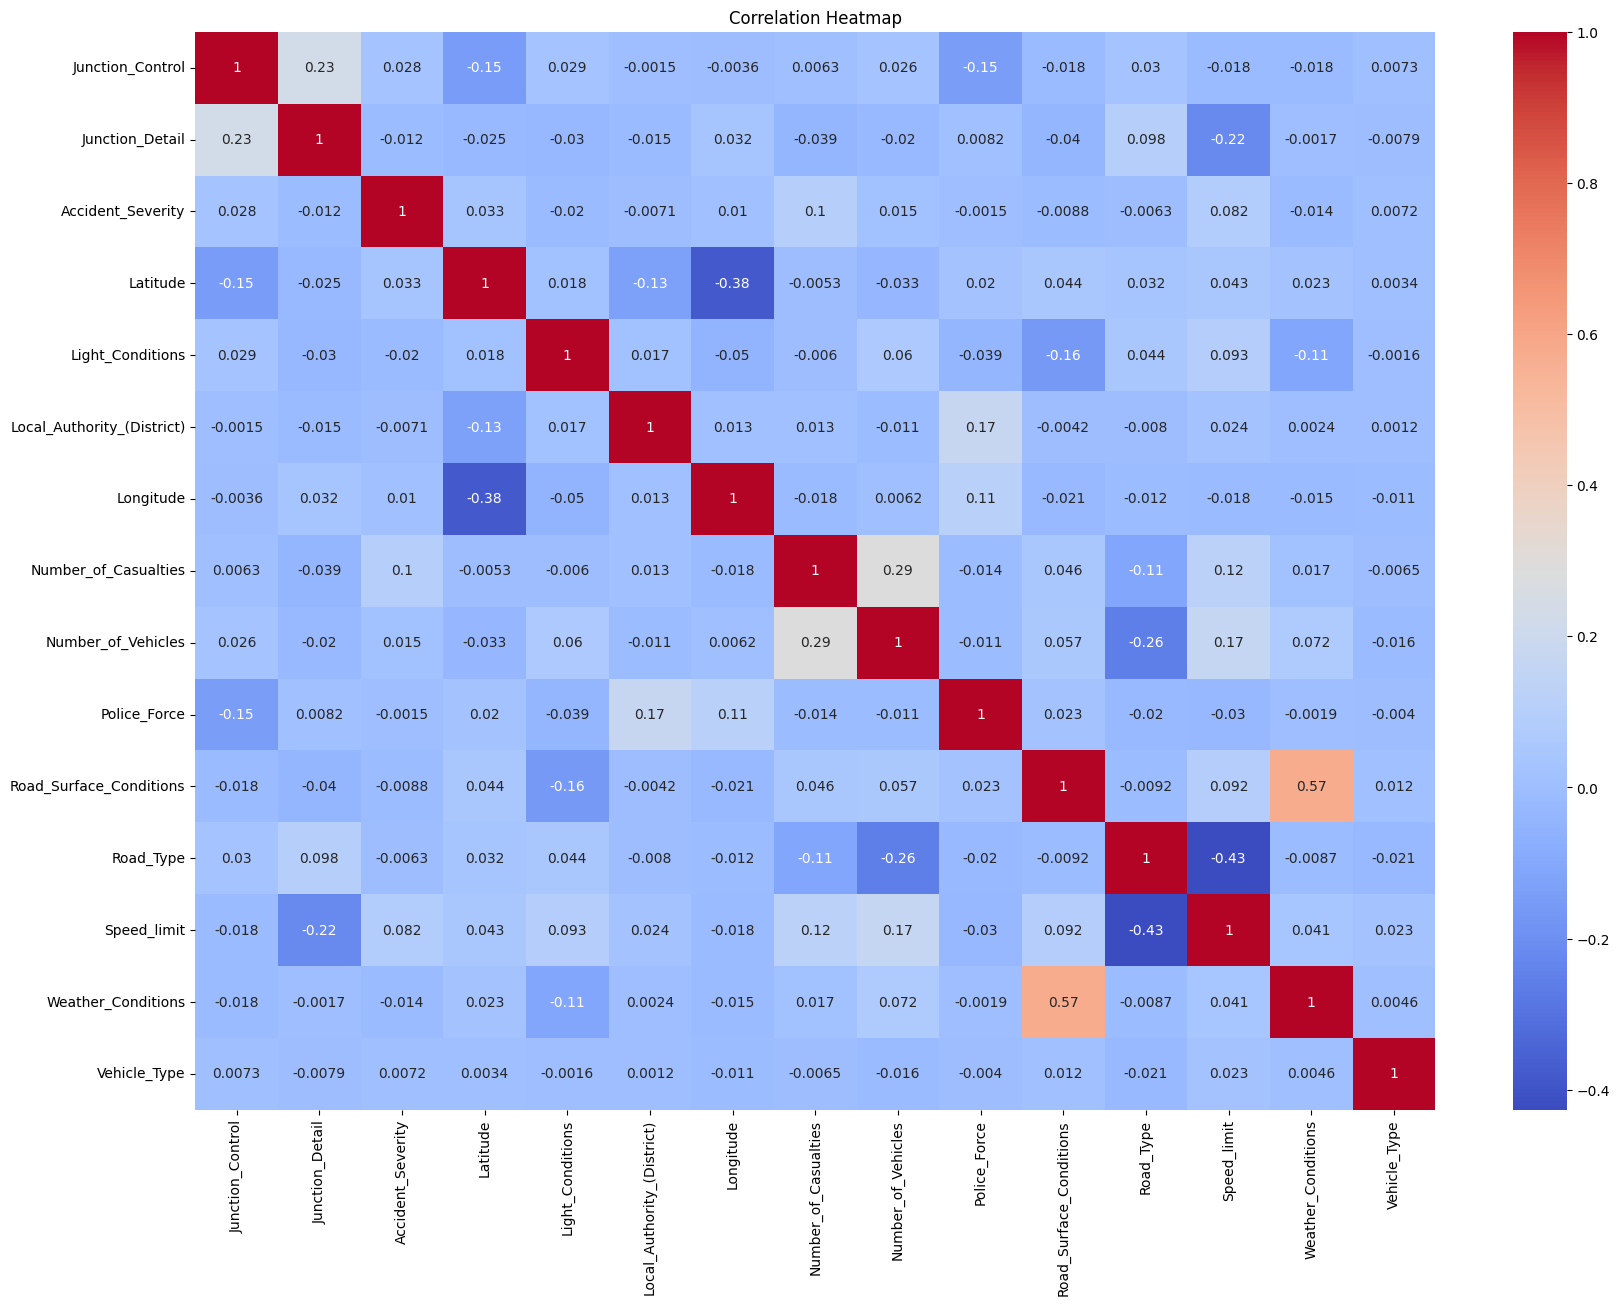

In [266]:
#visualising relationships
plt.figure(figsize=(20, 14))
sns.heatmap(road_accident_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

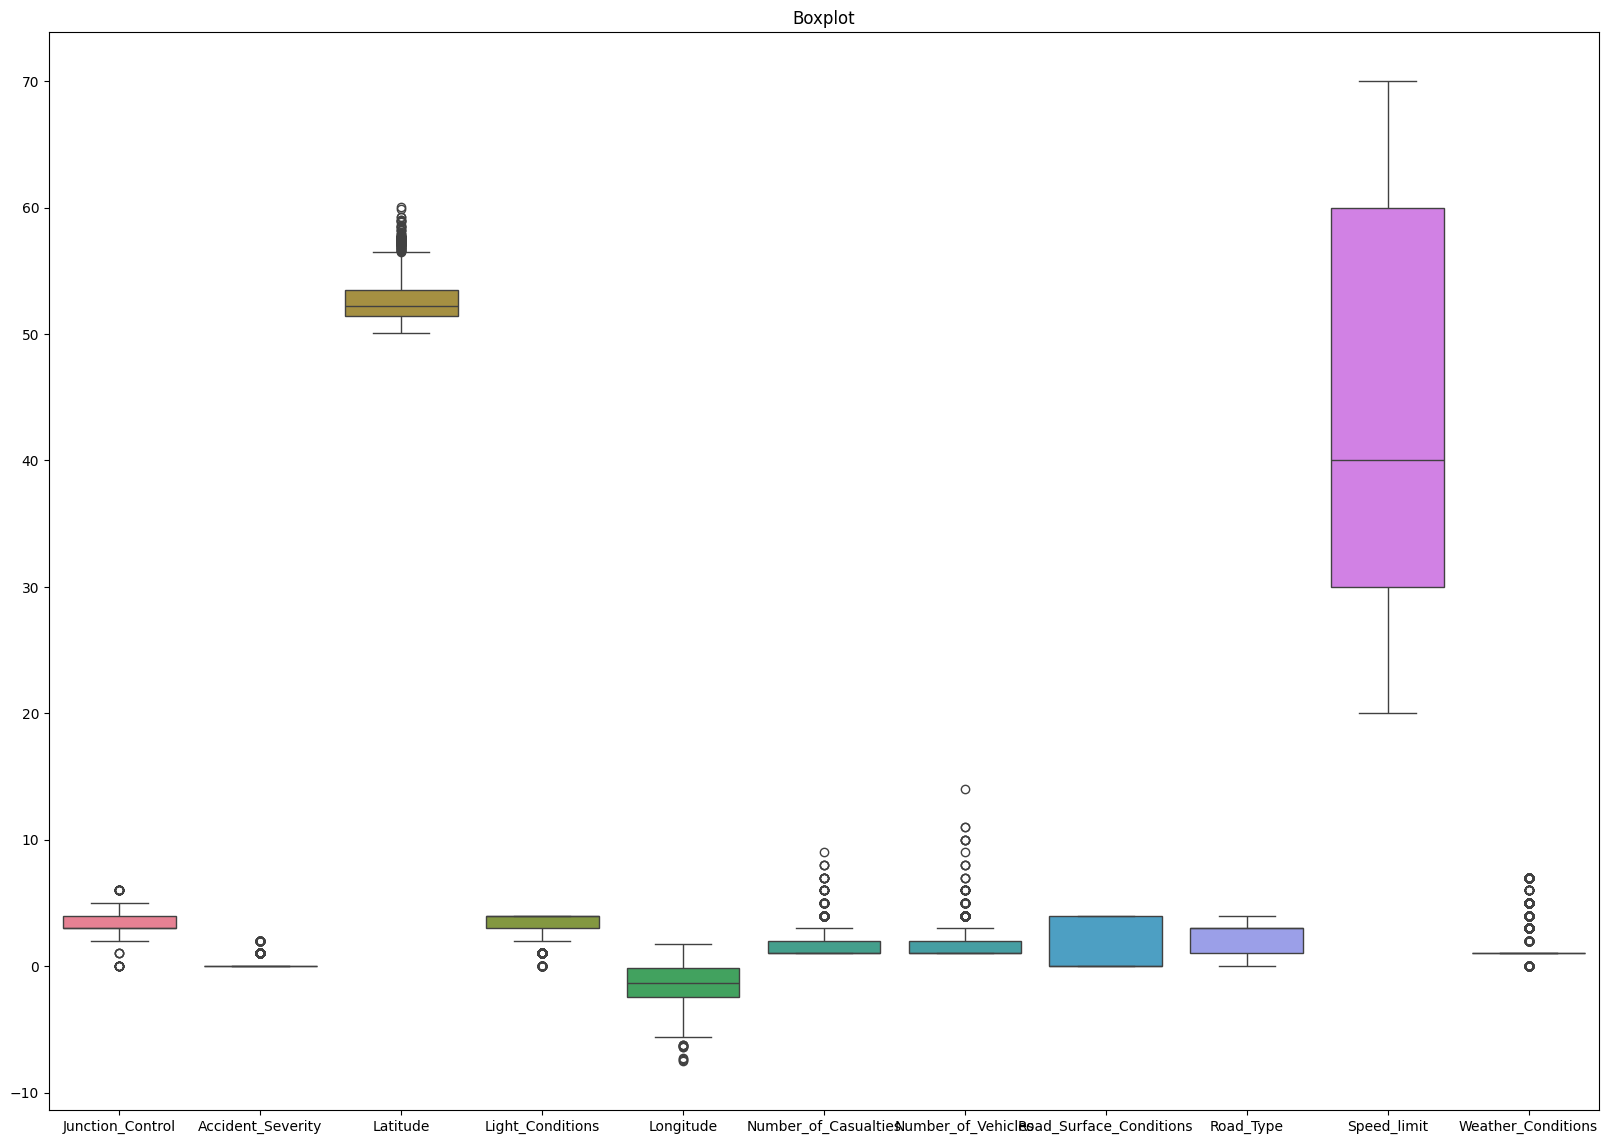

In [267]:
#boxplot
plt.figure(figsize=(20, 14))
sns.boxplot(data=road_accident_data)
plt.title('Boxplot')
plt.show()


In [268]:
#spliting the data to training and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

In [269]:
#creating a regressor
regressor = LinearRegression()

In [270]:
#giving the regressor to the trainning data
regressor.fit(x_train, y_train)

LinearRegression()

In [271]:
#accuracy check
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse )


Mean Squared Error: 0.15845798582142026


In [272]:
#saving the model
joblib.dump(regressor, 'road_accident_model.joblib')

['road_accident_model.joblib']

In [273]:
#loading the model
loaded_model = joblib.load('road_accident_model.joblib')

In [274]:
#loading entire data to be #loading entire data to be used by the model
def preprocess_input(road_accident_data): # Changed preprocessed_input to preprocess_input
    # Impute missing values instead of dropping rows
    # Check if the column has any non-NaN values before calculating mode
    if road_accident_data['Carriageway_Hazards'].notna().any():
        road_accident_data['Carriageway_Hazards'] = road_accident_data['Carriageway_Hazards'].fillna(accident_df['Carriageway_Hazards'].mode()[0])  # Fill with mode if non-NaN values exist
    else:
        road_accident_data['Carriageway_Hazards'] = road_accident_data['Carriageway_Hazards'].fillna('Unknown')  # Fill with a default value if all values are NaN

    # accident_df = accident_df.dropna() # Remove this line or comment it
    columns_to_be_droped = ['Carriageway_Hazards', 'Time', 'Urban_or_Rural_Area', 'Accident Date', 'Accident_Index', 'Day_of_Week','Accident_Severity'] # Added 'Accident_Severity' to the list of columns to be dropped
    road_accident_data = road_accident_data.drop(columns=columns_to_be_droped, axis=1)
    road_accident_data['Local_Authority_(District)'] = road_accident_data['Local_Authority_(District)'].astype('category').cat.codes.astype('category')
    road_accident_data['Police_Force'] = road_accident_data['Police_Force'].astype('category').cat.codes.astype('category')
    road_accident_data['Vehicle_Type'] = road_accident_data['Vehicle_Type'].astype('category').cat.codes.astype('category')
    road_accident_data['Junction_Detail'] = road_accident_data['Junction_Detail'].astype('category').cat.codes.astype('category')  # Convert to category codes
    # Initialize LabelEncoder once outside the function
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    road_accident_data['Road_Surface_Conditions'] = label_encoder.fit_transform(road_accident_data['Road_Surface_Conditions'])
    road_accident_data['Light_Conditions'] = label_encoder.fit_transform(road_accident_data['Light_Conditions'])
    road_accident_data['Weather_Conditions'] = label_encoder.fit_transform(road_accident_data['Weather_Conditions'])
    road_accident_data['Road_Type'] = label_encoder.fit_transform(road_accident_data['Road_Type'])
    road_accident_data['Junction_Control'] = label_encoder.fit_transform(road_accident_data['Junction_Control'])
    return road_accident_data

In [281]:
#loading new data for prediction
import numpy as np
new = {'Accident_Index':['201001SX20018'], 'Accident Date':['4/9/2022'], 'Day_of_Week':['Thursday'], 'Junction_Control':['Auto traffic signal'],
       'Junction_Detail':['Crossroads'], 'Accident_Severity':['Slight'], 'Latitude':[51.621277], 'Light_Conditions':['Daylight'],
       'Local_Authority_(District)':['Barnet'], 'Carriageway_Hazards':[np.nan], 'Longitude':['-0.274185'],
       'Number_of_Casualties':[1], 'Number_of_Vehicles':[2], 'Police_Force':['Metropolitan Police'],
       'Road_Surface_Conditions':['Dry'], 'Road_Type':['Dual carriageway'], 'Speed_limit':[50], 'Time':[1239],
       'Urban_or_Rural_Area':['Urban'], 'Weather_Conditions':['Fine no high winds'], 'Vehicle_Type':['Car']

}





In [285]:

road_accident_data = pd.DataFrame(new)

